In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
calendar=pd.read_csv("C:/Users/priya/OneDrive/Desktop/Capstone/calendar.csv")

In [52]:
calendar

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125
...,...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06 00:00:00.000000,1,64.0,64.0,1,10
319188,319189,36953202,2022-07-08 00:00:00.000000,0,140.0,140.0,3,1125
319189,319190,39580214,2022-06-13 00:00:00.000000,1,49.0,49.0,1,13
319190,319191,49016014,2022-10-26 00:00:00.000000,0,60.0,60.0,2,30


#### Now checking the calendar data and finding anomalies in it.

##### 1. Checking for the null Values.

In [53]:
calendar.isna().sum()

calender_id        0
listing_id         0
date               0
available          0
price             75
adjusted_price    75
minimum_nights     0
maximum_nights     0
dtype: int64

##### As there are 75 data points are empty we need to to impute the data, will use .describe() functions for the two columns and we will check for outliers using box plot

In [54]:
calendar[["price","adjusted_price"]].describe()

,price,adjusted_price
count,319117.000000,319117.000000
mean,109.917779,109.712131
std,185.791168,185.551851
min,13.000000,13.000000
25%,59.000000,58.000000
50%,79.000000,79.000000
75%,115.000000,115.000000
max,5800.000000,5800.000000


AS the standard deviation is more than the mean this indicates high variation between values, and abnormal distribution for data.

###### Checking with boxplot and imputing data 

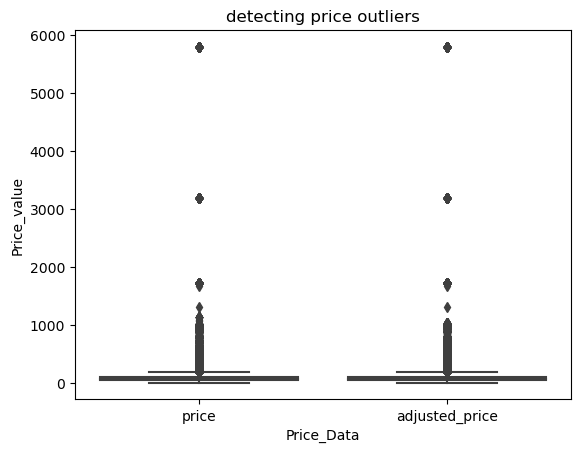

In [55]:
sns.boxplot(data=calendar[['price',"adjusted_price"]])
plt.ylabel('Price_value')
plt.xlabel('Price_Data')
plt.title('detecting price outliers')
plt.show()

As the data have many outliers we need to impute the data using median of the data in price and adjusted price columns

In [56]:
calendar[['price',"adjusted_price"]].median()

price             79.0
adjusted_price    79.0
dtype: float64

In [57]:
calendar['price'].fillna(calendar['price'].median(),inplace=True)

In [58]:
calendar['adjusted_price'].fillna(calendar['adjusted_price'].median(),inplace=True)

In [59]:
calendar.isna().sum()

calender_id       0
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

Now checking for duplicates in the data

In [60]:
duplicate_values=calendar[calendar.duplicated()]
duplicate_values

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights


As we can see there are no duplicates, can proceed further to another dataset

In [61]:
Hosts=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Capstone\hosts.csv")
Hosts

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...
...,...,...,...,...,...
1106,434049804,Mathias,2021-11-30 00:00:00.000000,BE,NaN
1107,435722877,Tatjana,2021-12-12 00:00:00.000000,BE,NaN
1108,435999398,Flor,2021-12-14 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
1109,436739371,Naser,2021-12-20 00:00:00.000000,BE,NaN


checking for null and duplicate values in the dataset

In [62]:
Hosts.isna().sum()

host_id            0
host_name          0
host_since         0
host_location      3
host_about       621
dtype: int64

As host_about is not necsary for analysis, dropping the same column

In [63]:
Hosts=Hosts.drop(['host_about'],axis=1)

In [64]:
Hosts['host_location'].mode()

0    Antwerp, Flanders, Belgium
Name: host_location, dtype: object

Imputing the null values with mode

In [65]:
Hosts['host_location'].fillna(Hosts['host_location'].mode()[0],inplace=True)

In [66]:
Hosts.isna().sum()

host_id          0
host_name        0
host_since       0
host_location    0
dtype: int64

Checking for Duplicate Values

In [67]:
Hosts[Hosts.duplicated()]

,host_id,host_name,host_since,host_location


As there are no duplicate values we cam move to another dataset

In [68]:
listings=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Capstone\listings.csv")
listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


###### Checking for null values and dropping unnecessary columns in the dataset

In [69]:
listings.isna().sum()

listing_id          0
listing_url         0
name                0
description        70
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64

In [70]:
listings[["description","name","listing_url"]]

,description,name,listing_url
0,Decorated in a vintage style combined with a f...,aplace/antwerp: cosy suite - fashion district,https://www.airbnb.com/rooms/50904
1,Enjoy your stay at our 4 person apartment in t...,Spacious apartment nearby Mas,https://www.airbnb.com/rooms/116134
2,Do you enjoy authentic places with a lot of ch...,Apartment with terrace in trendy Zurenborg,https://www.airbnb.com/rooms/218916
3,"Large bedroom in classic 1930s house. Kitchen,...",Large stylish room in 1930s house + garden,https://www.airbnb.com/rooms/224333
4,"<b>The space</b><br />Apartment ""Roscam"" is a ...",APARTMENT ROSCAM - OLD CENTRE ANTWERP,https://www.airbnb.com/rooms/224682
...,...,...,...
1744,Industrial loft (110m²) with a relaxing urban ...,Industrial spacious loft in Antwerp!,https://www.airbnb.com/rooms/53916524
1745,Recent gerenoveerde rustige studio van circa 2...,Studio in het midden van Antwerpen,https://www.airbnb.com/rooms/53928545
1746,Vanuit deze ideaal gelegen accommodatie kun je...,Mooi appartement met open haard,https://www.airbnb.com/rooms/53929354
1747,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",Kasteel Boterlaerhof vlakbij Antwerpen,https://www.airbnb.com/rooms/53949105


Dropping the above columns as they are not necessary for data analysis

In [71]:
listings=listings.drop(listings[["description","name","listing_url"]],axis=1)
listings

,listing_id,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933
...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712
1745,53928545,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936
1746,53929354,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639
1747,53949105,51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714


In [72]:
listings.isna().sum()

listing_id          0
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64

In [73]:
listings[["bedrooms","beds"]].describe()

,bedrooms,beds
count,1621.000000,1708.000000
mean,1.529303,2.220726
std,1.091453,2.227509
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,20.000000,44.000000


<Axes: >

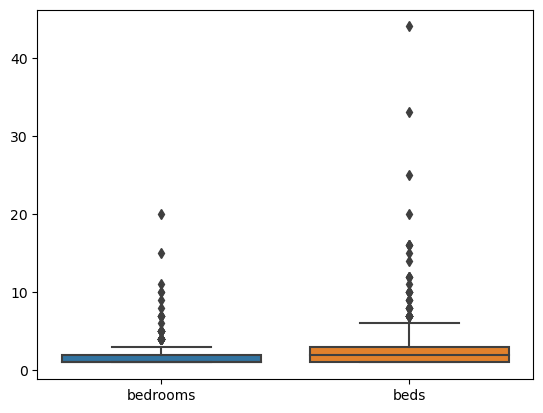

In [74]:
sns.boxplot(data=listings[["bedrooms","beds"]])

In [75]:
listings[["bedrooms","beds"]].median()

bedrooms    1.0
beds        2.0
dtype: float64

As there are many outliers, imputing the null values in data with median. 

In [76]:
listings['bedrooms'].fillna(listings['bedrooms'].median(),inplace=True)
listings['beds'].fillna(listings['beds'].median(),inplace=True)

In [77]:
listings.isna().sum()

listing_id        0
latitude          0
longitude         0
property_type     0
room_type         0
accomodates       0
bathrooms_text    0
bedrooms          0
beds              0
amenities         0
host_id           0
dtype: int64

AS There are no null values, moving towards next data

In [78]:
reviews=pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Capstone\reviews.csv")
reviews

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...
...,...,...,...,...,...,...
62982,62983,53538847,2021-12-05 00:00:00.000000,48076753,Serge,The place as it's shown in the photos. Great l...
62983,62984,53600839,2021-12-12 00:00:00.000000,6635741,Dániel,The spacious apartment is idyllically located ...
62984,62985,53819793,2021-12-21 00:00:00.000000,247934155,Gijs,It was great
62985,62986,53825194,2021-12-19 00:00:00.000000,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...


In [79]:
reviews["review_date"]=reviews["date"]
reviews

,review_id,listing_id,date,reviewer_id,reviewer_name,comments,review_date
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,2015-05-06 00:00:00.000000
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help...",2021-10-10 00:00:00.000000
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,...",2012-03-05 00:00:00.000000
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar...",2012-05-25 00:00:00.000000
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...,2013-09-03 00:00:00.000000
...,...,...,...,...,...,...,...
62982,62983,53538847,2021-12-05 00:00:00.000000,48076753,Serge,The place as it's shown in the photos. Great l...,2021-12-05 00:00:00.000000
62983,62984,53600839,2021-12-12 00:00:00.000000,6635741,Dániel,The spacious apartment is idyllically located ...,2021-12-12 00:00:00.000000
62984,62985,53819793,2021-12-21 00:00:00.000000,247934155,Gijs,It was great,2021-12-21 00:00:00.000000
62985,62986,53825194,2021-12-19 00:00:00.000000,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...,2021-12-19 00:00:00.000000


In [80]:
reviews=reviews.drop(["date"],axis=1)
reviews

,review_id,listing_id,reviewer_id,reviewer_name,comments,review_date
0,1,50904,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...,2015-05-06 00:00:00.000000
1,2,50904,333559,Emilie,"Karin is a wonderful host, she was really help...",2021-10-10 00:00:00.000000
2,3,116134,928644,Aurélien,"Amazing flat, really close from the MAS Musem,...",2012-03-05 00:00:00.000000
3,4,116134,231288,Gail,"This is a well equipped, very comfortable apar...",2012-05-25 00:00:00.000000
4,5,116134,7984251,Marcel,This is a very nice appartement. We really lik...,2013-09-03 00:00:00.000000
...,...,...,...,...,...,...
62982,62983,53538847,48076753,Serge,The place as it's shown in the photos. Great l...,2021-12-05 00:00:00.000000
62983,62984,53600839,6635741,Dániel,The spacious apartment is idyllically located ...,2021-12-12 00:00:00.000000
62984,62985,53819793,247934155,Gijs,It was great,2021-12-21 00:00:00.000000
62985,62986,53825194,361042882,Siarhei,Flor es muy atenta y me ayudo mucho entrando a...,2021-12-19 00:00:00.000000
